<a href="https://colab.research.google.com/github/G-Subramani/QSAR_model/blob/main/PKD1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install chembl_webresource_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [3]:
#Search for a target protien
target=new_client.target
target_query=target.search("Pkd1")
targets=pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Rattus norvegicus,Pkd1,22.0,False,CHEMBL1687686,"[{'accession': 'Q9ERV0', 'component_descriptio...",SINGLE PROTEIN,10116
1,[],Homo sapiens,Polycystin-1,16.0,False,CHEMBL5772,"[{'accession': 'P98161', 'component_descriptio...",SINGLE PROTEIN,9606
2,[],Homo sapiens,Protein kinase C mu,13.0,False,CHEMBL3863,"[{'accession': 'Q15139', 'component_descriptio...",SINGLE PROTEIN,9606
3,[],Homo sapiens,Protein kinase C (PKC),4.0,False,CHEMBL2093867,"[{'accession': 'O94806', 'component_descriptio...",PROTEIN FAMILY,9606
4,[],Homo sapiens,"Protein kinase C, PKC; classical/novel",4.0,False,CHEMBL2096620,"[{'accession': 'O94806', 'component_descriptio...",PROTEIN FAMILY,9606


In [4]:
df = targets[targets['organism'] == 'Homo sapiens']
print(df)

  cross_references      organism                               pref_name  \
1               []  Homo sapiens                            Polycystin-1   
2               []  Homo sapiens                     Protein kinase C mu   
3               []  Homo sapiens                  Protein kinase C (PKC)   
4               []  Homo sapiens  Protein kinase C, PKC; classical/novel   

   score  species_group_flag target_chembl_id  \
1   16.0               False       CHEMBL5772   
2   13.0               False       CHEMBL3863   
3    4.0               False    CHEMBL2093867   
4    4.0               False    CHEMBL2096620   

                                   target_components     target_type  tax_id  
1  [{'accession': 'P98161', 'component_descriptio...  SINGLE PROTEIN    9606  
2  [{'accession': 'Q15139', 'component_descriptio...  SINGLE PROTEIN    9606  
3  [{'accession': 'O94806', 'component_descriptio...  PROTEIN FAMILY    9606  
4  [{'accession': 'O94806', 'component_descriptio...  PRO

In [5]:
targets['pref_name'].unique()

array(['Pkd1', 'Polycystin-1', 'Protein kinase C mu',
       'Protein kinase C (PKC)', 'Protein kinase C, PKC; classical/novel'],
      dtype=object)

In [6]:
df=targets[targets['pref_name']=="Protein kinase C (PKC)"]
print(df)

  cross_references      organism               pref_name  score  \
3               []  Homo sapiens  Protein kinase C (PKC)    4.0   

   species_group_flag target_chembl_id  \
3               False    CHEMBL2093867   

                                   target_components     target_type  tax_id  
3  [{'accession': 'O94806', 'component_descriptio...  PROTEIN FAMILY    9606  


In [7]:
selected_target=targets.target_chembl_id[3]
selected_target

'CHEMBL2093867'

In [8]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [9]:
df=pd.DataFrame.from_dict(res)

In [10]:
df.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,49416,[],CHEMBL760352,Inhibition of PKC,B,None,None,BAO_0000190,...,Homo sapiens,Protein kinase C (PKC),9606,None,None,IC50,uM,UO_0000065,None,33.0
1,None,None,62150,[],CHEMBL760352,Inhibition of PKC,B,None,None,BAO_0000190,...,Homo sapiens,Protein kinase C (PKC),9606,None,None,IC50,uM,UO_0000065,None,33.0
2,None,None,105577,[],CHEMBL760356,Inhibitory activity was determined against pro...,B,None,None,BAO_0000190,...,Homo sapiens,Protein kinase C (PKC),9606,None,None,IC50,uM,UO_0000065,None,100.0
3,None,None,106689,[],CHEMBL760356,Inhibitory activity was determined against pro...,B,None,None,BAO_0000190,...,Homo sapiens,Protein kinase C (PKC),9606,None,None,IC50,uM,UO_0000065,None,100.0
4,None,None,107905,[],CHEMBL760356,Inhibitory activity was determined against pro...,B,None,None,BAO_0000190,...,Homo sapiens,Protein kinase C (PKC),9606,None,None,IC50,uM,UO_0000065,None,500.0


In [11]:
df["assay_description"].unique()

array(['Inhibition of PKC',
       'Inhibitory activity was determined against protein kinase C (PKC) from porcine brain',
       'Inhibition of protein kinase C (PKC)',
       'Inhibition of Protein kinase C', 'Inhibition of protein kinase C',
       'Inhibition of protein kinase C (PKC) using histone III S protein',
       'Inhibitory activity against protein kinase C',
       'In vitro inhibition of protein kinase C (PKC)',
       'Inhibition of protein kinase C (PKC) isozyme',
       'Inhibition of protein kinase C (PKC) isozyme (no data)',
       'Inhibitory effect on protein kinase C using histone II-As as substrate',
       'Inhibition of Serine/threonine protein kinases C (Not determined)',
       'Inhibition of Serine/threonine protein kinases C',
       'Inhibition of Protein kinase C (Not tested)',
       'Inhibition of Protein Kinase C',
       'Inhibition Protein kinase C (PKC)',
       'Inhibitory activity against protein kinase C (PKC)',
       'In vitro inhibition of PK

In [12]:
df.to_csv("Protien_kinase_C.csv", index=False)

In [13]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)

Mounted at /content/gdrive/


In [14]:
mkdir -p "/content/gdrive/My Drive/Colab Notebooks/Data"

In [15]:
!cp Protien_kinase_C.csv "/content/gdrive/My Drive/Colab Notebooks/Data"

In [16]:
!ls "/content/gdrive/My Drive/Colab Notebooks/Data"

incident_event_log.csv	Polycystin-1_data.csv	Protien_kinase_C.csv
PKD1_datamu.csv		Protein_kinase_Cmu.csv


In [17]:
!head Protien_kinase_C.csv

action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
,,49416,[],CHEMBL760352,Inhibition of PKC,B,,,BAO_0000190,BAO_0000224,protein format,Nc1ncnc2c1c(-c1ccc(Oc3ccccc3)cc1)cn2C1CCC(O)C1,,,CHEMBL1132739,Bioorg Med Chem Lett,2000,"{'bei': '11.60', 'le': '0.21', 'lle': '-0.08', 'sei': '5.20'}",CHEMBL69129,,CHEMBL69129,4.48,0,http://www.openphacts.org/units/Nanomola

In [18]:
activity=new_client.activity
res=activity.filter(target_chembl_id=selected_target).filter(stanadard_type="IC50")

In [19]:
df=pd.DataFrame.from_dict(res)

In [20]:
df.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,49416,[],CHEMBL760352,Inhibition of PKC,B,None,None,BAO_0000190,...,Homo sapiens,Protein kinase C (PKC),9606,None,None,IC50,uM,UO_0000065,None,33.0
1,None,None,62150,[],CHEMBL760352,Inhibition of PKC,B,None,None,BAO_0000190,...,Homo sapiens,Protein kinase C (PKC),9606,None,None,IC50,uM,UO_0000065,None,33.0
2,None,None,105577,[],CHEMBL760356,Inhibitory activity was determined against pro...,B,None,None,BAO_0000190,...,Homo sapiens,Protein kinase C (PKC),9606,None,None,IC50,uM,UO_0000065,None,100.0
3,None,None,106689,[],CHEMBL760356,Inhibitory activity was determined against pro...,B,None,None,BAO_0000190,...,Homo sapiens,Protein kinase C (PKC),9606,None,None,IC50,uM,UO_0000065,None,100.0
4,None,None,107905,[],CHEMBL760356,Inhibitory activity was determined against pro...,B,None,None,BAO_0000190,...,Homo sapiens,Protein kinase C (PKC),9606,None,None,IC50,uM,UO_0000065,None,500.0


In [21]:
#Handling missing data
#If any compounds has missing value for the standard_value and canonical_smiles column then drop it.

In [22]:
df1 = df[df.standard_value.notna()]
df1 = df1[df.canonical_smiles.notna()]
df1

<ipython-input-22-0505691090ba>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[df.canonical_smiles.notna()]


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,49416,[],CHEMBL760352,Inhibition of PKC,B,None,None,BAO_0000190,...,Homo sapiens,Protein kinase C (PKC),9606,None,None,IC50,uM,UO_0000065,None,33.0
1,None,None,62150,[],CHEMBL760352,Inhibition of PKC,B,None,None,BAO_0000190,...,Homo sapiens,Protein kinase C (PKC),9606,None,None,IC50,uM,UO_0000065,None,33.0
2,None,None,105577,[],CHEMBL760356,Inhibitory activity was determined against pro...,B,None,None,BAO_0000190,...,Homo sapiens,Protein kinase C (PKC),9606,None,None,IC50,uM,UO_0000065,None,100.0
3,None,None,106689,[],CHEMBL760356,Inhibitory activity was determined against pro...,B,None,None,BAO_0000190,...,Homo sapiens,Protein kinase C (PKC),9606,None,None,IC50,uM,UO_0000065,None,100.0
4,None,None,107905,[],CHEMBL760356,Inhibitory activity was determined against pro...,B,None,None,BAO_0000190,...,Homo sapiens,Protein kinase C (PKC),9606,None,None,IC50,uM,UO_0000065,None,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,None,None,24984695,[],CHEMBL5227426,Inhibition of Protein kinase C (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Protein kinase C (PKC),9606,None,None,IC50,uM,UO_0000065,None,100.0
1000,None,None,25007776,[],CHEMBL5235558,Inhibition of PKC (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Protein kinase C (PKC),9606,None,None,IC50,uM,UO_0000065,None,250.0
1001,None,None,25041350,[],CHEMBL5244905,Inhibition of PKC (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Protein kinase C (PKC),9606,None,None,IC50,uM,UO_0000065,None,100.0
1009,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25106405,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5263430,Inhibition of PKC (unknown origin) using acety...,B,None,None,BAO_0000190,...,Homo sapiens,Protein kinase C (PKC),9606,None,None,IC50,uM,UO_0000065,None,25.01


In [23]:
df1["standard_value"].value_counts()

,count
standard_value,
100000.0,39
25000.0,34
200000.0,28
1.0,25
0.0,22
...,...
763.0,1
415.0,1
130000.0,1


In [24]:
df1["type"].value_counts()

,count
type,
IC50,476
INH,101
Activity,91
Inhibition,46
PKC,17
Ki,14
ID50,13
EC50,9
Selectivity,1


In [25]:
len(df1.canonical_smiles.unique())

605

In [26]:
df2_nr=df1.drop_duplicates(["canonical_smiles"])
df2_nr

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,49416,[],CHEMBL760352,Inhibition of PKC,B,None,None,BAO_0000190,...,Homo sapiens,Protein kinase C (PKC),9606,None,None,IC50,uM,UO_0000065,None,33.0
1,None,None,62150,[],CHEMBL760352,Inhibition of PKC,B,None,None,BAO_0000190,...,Homo sapiens,Protein kinase C (PKC),9606,None,None,IC50,uM,UO_0000065,None,33.0
2,None,None,105577,[],CHEMBL760356,Inhibitory activity was determined against pro...,B,None,None,BAO_0000190,...,Homo sapiens,Protein kinase C (PKC),9606,None,None,IC50,uM,UO_0000065,None,100.0
3,None,None,106689,[],CHEMBL760356,Inhibitory activity was determined against pro...,B,None,None,BAO_0000190,...,Homo sapiens,Protein kinase C (PKC),9606,None,None,IC50,uM,UO_0000065,None,100.0
4,None,None,107905,[],CHEMBL760356,Inhibitory activity was determined against pro...,B,None,None,BAO_0000190,...,Homo sapiens,Protein kinase C (PKC),9606,None,None,IC50,uM,UO_0000065,None,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,None,None,24984694,[],CHEMBL5227426,Inhibition of Protein kinase C (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Protein kinase C (PKC),9606,None,None,IC50,uM,UO_0000065,None,100.0
999,None,None,24984695,[],CHEMBL5227426,Inhibition of Protein kinase C (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Protein kinase C (PKC),9606,None,None,IC50,uM,UO_0000065,None,100.0
1001,None,None,25041350,[],CHEMBL5244905,Inhibition of PKC (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Protein kinase C (PKC),9606,None,None,IC50,uM,UO_0000065,None,100.0
1009,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25106405,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5263430,Inhibition of PKC (unknown origin) using acety...,B,None,None,BAO_0000190,...,Homo sapiens,Protein kinase C (PKC),9606,None,None,IC50,uM,UO_0000065,None,25.01


In [27]:
#Data pre-processing of the bioactivity data
#Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame

In [28]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL69129,Nc1ncnc2c1c(-c1ccc(Oc3ccccc3)cc1)cn2C1CCC(O)C1,33000.0
1,CHEMBL47940,Nc1ncnc2c1c(-c1ccc(Oc3ccccc3)cc1)cn2C1CCCC1,33000.0
2,CHEMBL266969,O=C1NC(=O)c2cc(NC3CCCCC3)c(NC3CCCCC3)cc21,100000.0
3,CHEMBL8000,O=C1c2cc(Nc3ccccc3)c(Nc3ccccc3)cc2C(=O)N1c1ccccc1,100000.0
4,CHEMBL8091,COC(=O)c1cc(Nc2ccc(F)cc2)c(Nc2ccc(F)cc2)cc1C(=...,500000.0
...,...,...,...
998,CHEMBL296586,O=C1Cc2c([nH]c3ccc(Br)cc23)-c2ccccc2N1,100000.0
999,CHEMBL50894,O=C1Cc2c([nH]c3ccc([N+](=O)[O-])cc23)-c2ccccc2N1,100000.0
1001,CHEMBL56904,CN1CCN(Cc2ccc(C(=O)Nc3cccc(Nc4nccc(-c5cccnc5)n...,100000.0
1009,CHEMBL244948,O=c1ccc2ccc(O)c(O)c2o1,25010.0


In [29]:
df3.to_csv('Protien_kinase_C_data_preprocessed.csv', index=False)

In [30]:
#Labeling compounds as either being active, inactive or intermediate
#The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be active while those greater than 10,000 nM will be considered to be inactive. As for those values in between 1,000 and 10,000 nM will be referred to as intermediate.

In [31]:
df4 = pd.read_csv('Protien_kinase_C_data_preprocessed.csv')

In [32]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [33]:
bioactivity_class = pd.Series(bioactivity_threshold, name='Bioactivity_class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,Bioactivity_class
0,CHEMBL69129,Nc1ncnc2c1c(-c1ccc(Oc3ccccc3)cc1)cn2C1CCC(O)C1,33000.0,inactive
1,CHEMBL47940,Nc1ncnc2c1c(-c1ccc(Oc3ccccc3)cc1)cn2C1CCCC1,33000.0,inactive
2,CHEMBL266969,O=C1NC(=O)c2cc(NC3CCCCC3)c(NC3CCCCC3)cc21,100000.0,inactive
3,CHEMBL8000,O=C1c2cc(Nc3ccccc3)c(Nc3ccccc3)cc2C(=O)N1c1ccccc1,100000.0,inactive
4,CHEMBL8091,COC(=O)c1cc(Nc2ccc(F)cc2)c(Nc2ccc(F)cc2)cc1C(=...,500000.0,inactive
...,...,...,...,...
600,CHEMBL296586,O=C1Cc2c([nH]c3ccc(Br)cc23)-c2ccccc2N1,100000.0,inactive
601,CHEMBL50894,O=C1Cc2c([nH]c3ccc([N+](=O)[O-])cc23)-c2ccccc2N1,100000.0,inactive
602,CHEMBL56904,CN1CCN(Cc2ccc(C(=O)Nc3cccc(Nc4nccc(-c5cccnc5)n...,100000.0,inactive
603,CHEMBL244948,O=c1ccc2ccc(O)c(O)c2o1,25010.0,inactive


In [34]:
df5["Bioactivity_class"].value_counts()

,count
Bioactivity_class,
active,297
inactive,253
intermediate,55


In [35]:
df5.to_csv('Protien_kinase_C_data_curated.csv', index=False)

In [36]:
! zip Protien_kinase_C.zip *.csv

  adding: Protien_kinase_C.csv (deflated 89%)
  adding: Protien_kinase_C_data_curated.csv (deflated 83%)
  adding: Protien_kinase_C_data_preprocessed.csv (deflated 82%)


In [37]:
!ls -l

total 420
drwx------ 7 root root   4096 Mar  2 12:05 gdrive
-rw-r--r-- 1 root root 241697 Mar  2 12:04 Protien_kinase_C.csv
-rw-r--r-- 1 root root  63160 Mar  2 12:07 Protien_kinase_C_data_curated.csv
-rw-r--r-- 1 root root  58071 Mar  2 12:07 Protien_kinase_C_data_preprocessed.csv
-rw-r--r-- 1 root root  47807 Mar  2 12:07 Protien_kinase_C.zip
drwxr-xr-x 1 root root   4096 Feb 27 14:22 sample_data


Install conda and rdkit

In [38]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 45.8 MB/s eta 0:00:00


In [39]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [40]:
import pandas as pd

In [41]:
df = pd.read_csv('Protien_kinase_C_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,Bioactivity_class
0,CHEMBL69129,Nc1ncnc2c1c(-c1ccc(Oc3ccccc3)cc1)cn2C1CCC(O)C1,33000.0,inactive
1,CHEMBL47940,Nc1ncnc2c1c(-c1ccc(Oc3ccccc3)cc1)cn2C1CCCC1,33000.0,inactive
2,CHEMBL266969,O=C1NC(=O)c2cc(NC3CCCCC3)c(NC3CCCCC3)cc21,100000.0,inactive
3,CHEMBL8000,O=C1c2cc(Nc3ccccc3)c(Nc3ccccc3)cc2C(=O)N1c1ccccc1,100000.0,inactive
4,CHEMBL8091,COC(=O)c1cc(Nc2ccc(F)cc2)c(Nc2ccc(F)cc2)cc1C(=...,500000.0,inactive
...,...,...,...,...
600,CHEMBL296586,O=C1Cc2c([nH]c3ccc(Br)cc23)-c2ccccc2N1,100000.0,inactive
601,CHEMBL50894,O=C1Cc2c([nH]c3ccc([N+](=O)[O-])cc23)-c2ccccc2N1,100000.0,inactive
602,CHEMBL56904,CN1CCN(Cc2ccc(C(=O)Nc3cccc(Nc4nccc(-c5cccnc5)n...,100000.0,inactive
603,CHEMBL244948,O=c1ccc2ccc(O)c(O)c2o1,25010.0,inactive


In [42]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [43]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [44]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,Bioactivity_class,canonical_smiles
0,CHEMBL69129,33000.0,inactive,Nc1ncnc2c1c(-c1ccc(Oc3ccccc3)cc1)cn2C1CCC(O)C1
1,CHEMBL47940,33000.0,inactive,Nc1ncnc2c1c(-c1ccc(Oc3ccccc3)cc1)cn2C1CCCC1
2,CHEMBL266969,100000.0,inactive,O=C1NC(=O)c2cc(NC3CCCCC3)c(NC3CCCCC3)cc21
3,CHEMBL8000,100000.0,inactive,O=C1c2cc(Nc3ccccc3)c(Nc3ccccc3)cc2C(=O)N1c1ccccc1
4,CHEMBL8091,500000.0,inactive,COC(=O)c1cc(Nc2ccc(F)cc2)c(Nc2ccc(F)cc2)cc1C(=...
...,...,...,...,...
600,CHEMBL296586,100000.0,inactive,O=C1Cc2c([nH]c3ccc(Br)cc23)-c2ccccc2N1
601,CHEMBL50894,100000.0,inactive,O=C1Cc2c([nH]c3ccc([N+](=O)[O-])cc23)-c2ccccc2N1
602,CHEMBL56904,100000.0,inactive,CN1CCN(Cc2ccc(C(=O)Nc3cccc(Nc4nccc(-c5cccnc5)n...
603,CHEMBL244948,25010.0,inactive,O=c1ccc2ccc(O)c(O)c2o1


Calculate Lipinski descriptors
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated the following:

Molecular weight < 500 Dalton
Octanol-water partition coefficient (LogP) < 5
Hydrogen bond donors < 5
Hydrogen bond acceptors < 10

Calculate descriptors

In [45]:
def lipinski(smiles, verbose=False):
  moldata=[]
  for elem in smiles:
    mol=Chem.MolFromSmiles(elem)
    moldata.append(mol)
  baseData=np.arange(1,1)
  i=0
  for mol in moldata:
    desc_MolWt=Descriptors.MolWt(mol)
    desc_MolLogP=Descriptors.MolLogP(mol)
    desc_NumHDonors=Lipinski.NumHDonors(mol)
    desc_NumHAcceptors=Lipinski.NumHAcceptors(mol)

    row=np.array([desc_MolWt,
                  desc_MolLogP,
                  desc_NumHDonors,
                  desc_NumHAcceptors
                  ])
    if (i==0):
      baseData=row
    else:
      baseData=np.vstack([baseData, row])
    i=i+1
  columnNames=["MW", "LogP", "NumHDonors", "NumHAcceptors"]
  descriptors=pd.DataFrame(data=baseData, columns=columnNames)
  return descriptors


In [46]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski


,MW,LogP,NumHDonors,NumHAcceptors
0,386.455,4.5587,2.0,6.0
1,370.456,5.5879,1.0,5.0
2,341.455,4.0594,3.0,4.0
3,405.457,5.9744,2.0,4.0
4,412.392,5.0252,2.0,6.0
...,...,...,...,...
600,327.181,4.0920,2.0,1.0
601,293.282,3.2377,2.0,3.0
602,479.588,4.2819,2.0,7.0
603,178.143,1.2042,2.0,4.0


Combine DataFrames
Let's take a look at the 2 DataFrames that will be combined.

In [47]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,386.455,4.5587,2.0,6.0
1,370.456,5.5879,1.0,5.0
2,341.455,4.0594,3.0,4.0
3,405.457,5.9744,2.0,4.0
4,412.392,5.0252,2.0,6.0
...,...,...,...,...
600,327.181,4.0920,2.0,1.0
601,293.282,3.2377,2.0,3.0
602,479.588,4.2819,2.0,7.0
603,178.143,1.2042,2.0,4.0


In [48]:
df

,molecule_chembl_id,canonical_smiles,standard_value,Bioactivity_class
0,CHEMBL69129,Nc1ncnc2c1c(-c1ccc(Oc3ccccc3)cc1)cn2C1CCC(O)C1,33000.0,inactive
1,CHEMBL47940,Nc1ncnc2c1c(-c1ccc(Oc3ccccc3)cc1)cn2C1CCCC1,33000.0,inactive
2,CHEMBL266969,O=C1NC(=O)c2cc(NC3CCCCC3)c(NC3CCCCC3)cc21,100000.0,inactive
3,CHEMBL8000,O=C1c2cc(Nc3ccccc3)c(Nc3ccccc3)cc2C(=O)N1c1ccccc1,100000.0,inactive
4,CHEMBL8091,COC(=O)c1cc(Nc2ccc(F)cc2)c(Nc2ccc(F)cc2)cc1C(=...,500000.0,inactive
...,...,...,...,...
600,CHEMBL296586,O=C1Cc2c([nH]c3ccc(Br)cc23)-c2ccccc2N1,100000.0,inactive
601,CHEMBL50894,O=C1Cc2c([nH]c3ccc([N+](=O)[O-])cc23)-c2ccccc2N1,100000.0,inactive
602,CHEMBL56904,CN1CCN(Cc2ccc(C(=O)Nc3cccc(Nc4nccc(-c5cccnc5)n...,100000.0,inactive
603,CHEMBL244948,O=c1ccc2ccc(O)c(O)c2o1,25010.0,inactive


In [49]:
df["Bioactivity_class"].value_counts()

,count
Bioactivity_class,
active,297
inactive,253
intermediate,55


In [50]:
df_combined = pd.concat([df,df_lipinski], axis=1)

Convert IC50 to pIC50
To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:

Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10
Take the molar value and apply -log10
Delete the standard_value column and create a new pIC50 column

In [51]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i * (10**-9)  # Converts nM to M

        # Replace zero or negative values with NaN to avoid math errors
        if molar <= 0:
            pIC50.append(np.nan)
        else:
            pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x


Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [52]:
df_combined.standard_value.describe()

,standard_value
count,605.000000
mean,44939.620876
std,103669.808072
min,-1.000000
25%,35.000000
50%,1400.000000
75%,40000.000000
max,1000000.000000


In [53]:
-np.log10( (10**-9)* 100000000 )

1.0

In [54]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [55]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [56]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,Bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL69129,Nc1ncnc2c1c(-c1ccc(Oc3ccccc3)cc1)cn2C1CCC(O)C1,inactive,386.455,4.5587,2.0,6.0,33000.0
1,CHEMBL47940,Nc1ncnc2c1c(-c1ccc(Oc3ccccc3)cc1)cn2C1CCCC1,inactive,370.456,5.5879,1.0,5.0,33000.0
2,CHEMBL266969,O=C1NC(=O)c2cc(NC3CCCCC3)c(NC3CCCCC3)cc21,inactive,341.455,4.0594,3.0,4.0,100000.0
3,CHEMBL8000,O=C1c2cc(Nc3ccccc3)c(Nc3ccccc3)cc2C(=O)N1c1ccccc1,inactive,405.457,5.9744,2.0,4.0,100000.0
4,CHEMBL8091,COC(=O)c1cc(Nc2ccc(F)cc2)c(Nc2ccc(F)cc2)cc1C(=...,inactive,412.392,5.0252,2.0,6.0,500000.0
...,...,...,...,...,...,...,...,...
600,CHEMBL296586,O=C1Cc2c([nH]c3ccc(Br)cc23)-c2ccccc2N1,inactive,327.181,4.0920,2.0,1.0,100000.0
601,CHEMBL50894,O=C1Cc2c([nH]c3ccc([N+](=O)[O-])cc23)-c2ccccc2N1,inactive,293.282,3.2377,2.0,3.0,100000.0
602,CHEMBL56904,CN1CCN(Cc2ccc(C(=O)Nc3cccc(Nc4nccc(-c5cccnc5)n...,inactive,479.588,4.2819,2.0,7.0,100000.0
603,CHEMBL244948,O=c1ccc2ccc(O)c(O)c2o1,inactive,178.143,1.2042,2.0,4.0,25010.0


In [57]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,605.000000
mean,44939.620876
std,103669.808072
min,-1.000000
25%,35.000000
50%,1400.000000
75%,40000.000000
max,1000000.000000


In [58]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,Bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL69129,Nc1ncnc2c1c(-c1ccc(Oc3ccccc3)cc1)cn2C1CCC(O)C1,inactive,386.455,4.5587,2.0,6.0,4.481486
1,CHEMBL47940,Nc1ncnc2c1c(-c1ccc(Oc3ccccc3)cc1)cn2C1CCCC1,inactive,370.456,5.5879,1.0,5.0,4.481486
2,CHEMBL266969,O=C1NC(=O)c2cc(NC3CCCCC3)c(NC3CCCCC3)cc21,inactive,341.455,4.0594,3.0,4.0,4.000000
3,CHEMBL8000,O=C1c2cc(Nc3ccccc3)c(Nc3ccccc3)cc2C(=O)N1c1ccccc1,inactive,405.457,5.9744,2.0,4.0,4.000000
4,CHEMBL8091,COC(=O)c1cc(Nc2ccc(F)cc2)c(Nc2ccc(F)cc2)cc1C(=...,inactive,412.392,5.0252,2.0,6.0,3.301030
...,...,...,...,...,...,...,...,...
600,CHEMBL296586,O=C1Cc2c([nH]c3ccc(Br)cc23)-c2ccccc2N1,inactive,327.181,4.0920,2.0,1.0,4.000000
601,CHEMBL50894,O=C1Cc2c([nH]c3ccc([N+](=O)[O-])cc23)-c2ccccc2N1,inactive,293.282,3.2377,2.0,3.0,4.000000
602,CHEMBL56904,CN1CCN(Cc2ccc(C(=O)Nc3cccc(Nc4nccc(-c5cccnc5)n...,inactive,479.588,4.2819,2.0,7.0,4.000000
603,CHEMBL244948,O=c1ccc2ccc(O)c(O)c2o1,inactive,178.143,1.2042,2.0,4.0,4.601886


In [59]:
df_final.pIC50.describe()

,pIC50
count,581.000000
mean,5.874648
std,1.714566
min,3.000000
25%,4.397940
50%,5.522879
75%,7.387216
max,10.045757


In [60]:
df_final.to_csv('Protien_kinase_C_bioactivity_data_3class_pIC50.csv')

Removing the 'intermediate' bioactivity class
Here, we will be removing the intermediate class from our data set.

In [61]:
df_2class = df_final[df_final['Bioactivity_class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,Bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL69129,Nc1ncnc2c1c(-c1ccc(Oc3ccccc3)cc1)cn2C1CCC(O)C1,inactive,386.455,4.5587,2.0,6.0,4.481486
1,CHEMBL47940,Nc1ncnc2c1c(-c1ccc(Oc3ccccc3)cc1)cn2C1CCCC1,inactive,370.456,5.5879,1.0,5.0,4.481486
2,CHEMBL266969,O=C1NC(=O)c2cc(NC3CCCCC3)c(NC3CCCCC3)cc21,inactive,341.455,4.0594,3.0,4.0,4.000000
3,CHEMBL8000,O=C1c2cc(Nc3ccccc3)c(Nc3ccccc3)cc2C(=O)N1c1ccccc1,inactive,405.457,5.9744,2.0,4.0,4.000000
4,CHEMBL8091,COC(=O)c1cc(Nc2ccc(F)cc2)c(Nc2ccc(F)cc2)cc1C(=...,inactive,412.392,5.0252,2.0,6.0,3.301030
...,...,...,...,...,...,...,...,...
600,CHEMBL296586,O=C1Cc2c([nH]c3ccc(Br)cc23)-c2ccccc2N1,inactive,327.181,4.0920,2.0,1.0,4.000000
601,CHEMBL50894,O=C1Cc2c([nH]c3ccc([N+](=O)[O-])cc23)-c2ccccc2N1,inactive,293.282,3.2377,2.0,3.0,4.000000
602,CHEMBL56904,CN1CCN(Cc2ccc(C(=O)Nc3cccc(Nc4nccc(-c5cccnc5)n...,inactive,479.588,4.2819,2.0,7.0,4.000000
603,CHEMBL244948,O=c1ccc2ccc(O)c(O)c2o1,inactive,178.143,1.2042,2.0,4.0,4.601886


In [62]:
df_2class.to_csv('Protien_kinase_C_bioactivity_data_2class_pIC50.csv')

Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors


Import library

In [63]:
df_2class.describe()

,MW,LogP,NumHDonors,NumHAcceptors,pIC50
count,550.000000,550.000000,550.000000,550.000000,526.000000
mean,498.373040,3.424736,3.725455,7.554545,5.921940
std,240.288524,2.684174,4.512994,6.445775,1.793710
min,162.192000,-8.457080,0.000000,1.000000,3.000000
25%,357.347000,1.978050,1.000000,4.000000,4.301030
50%,454.555000,3.844900,2.000000,6.000000,6.107193
75%,580.128500,5.075895,4.000000,9.000000,7.443697
max,3740.548000,16.229200,57.000000,104.000000,10.045757


Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors
Import library

In [64]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

Frequency plot of the 2 bioactivity classes

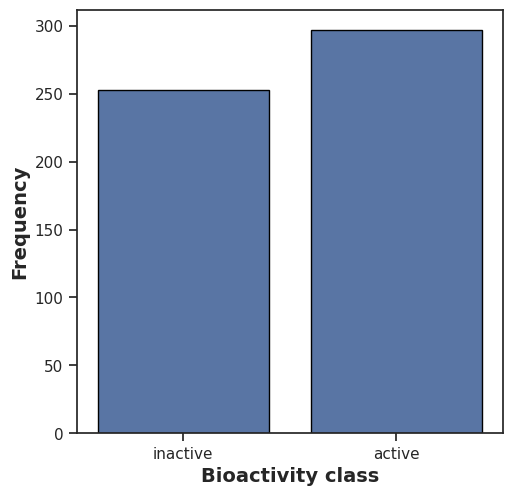

In [65]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='Bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

Scatter plot of MW versus LogP
It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

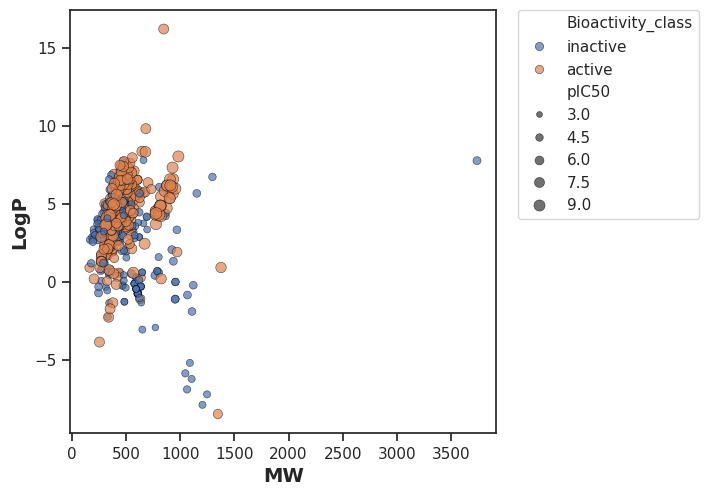

In [66]:

plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='Bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

Box plots
pIC50 value

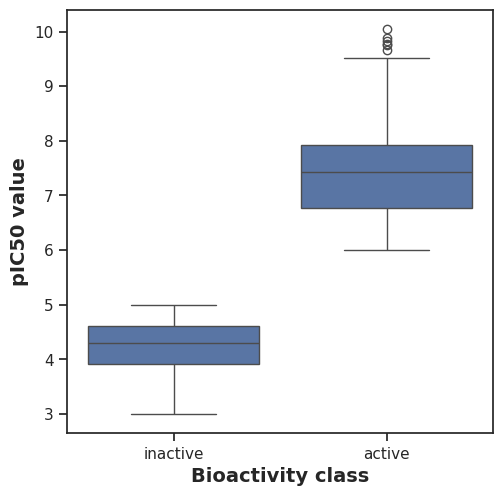

In [67]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'Bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

Statistical analysis | Mann-Whitney U Test

In [70]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'Bioactivity_class']
  df = df_2class[selection]
  active = df[df['Bioactivity_class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'Bioactivity_class']
  df = df_2class[selection]
  inactive = df[df['Bioactivity_class'] == 'inactive']
  inactive = inactive[descriptor]
  # compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [71]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,NaN,NaN,0.05,Different distribution (reject H0)


Molecular weight

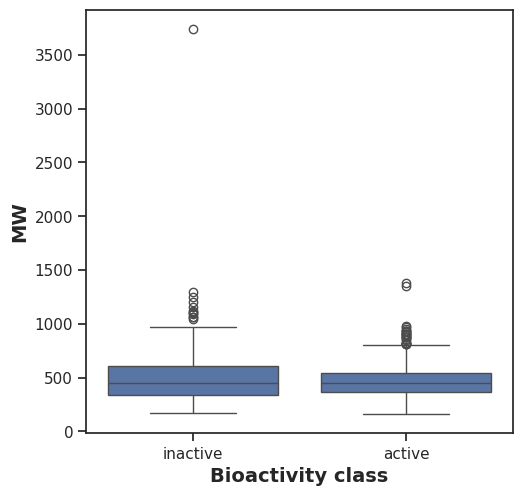

In [72]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'Bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [73]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,38450.5,0.635855,0.05,Same distribution (fail to reject H0)


LogP

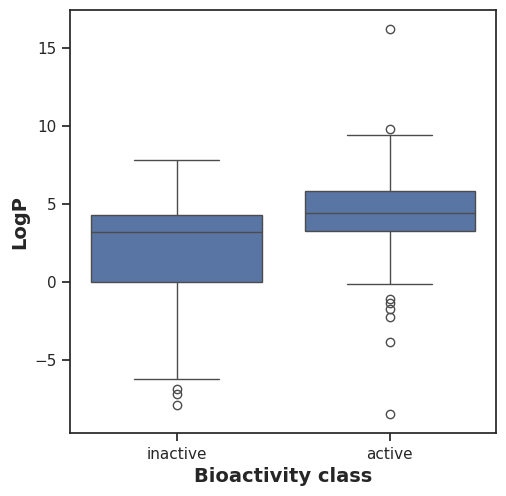

In [74]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'Bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

Statistical analysis | Mann-Whitney U Test

In [75]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,52369.0,1.627355e-15,0.05,Different distribution (reject H0)


NumHDonors

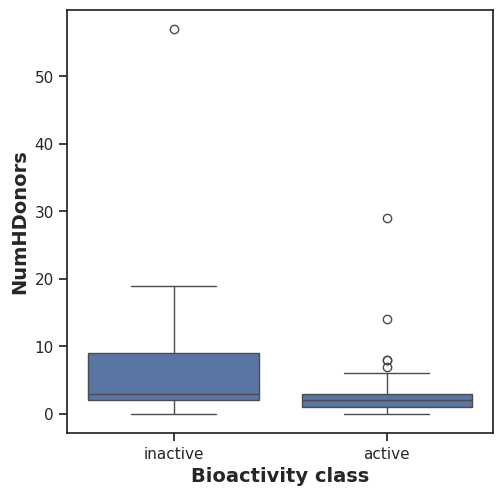

In [76]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'Bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

Statistical analysis | Mann-Whitney U Test

In [77]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,24648.5,1.658385e-12,0.05,Different distribution (reject H0)


NumHAcceptors

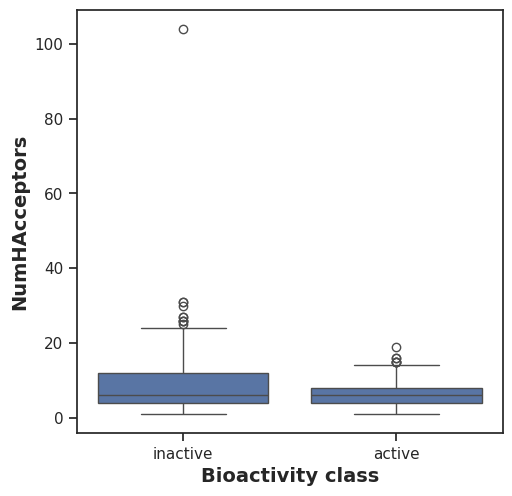

In [78]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'Bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [79]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,33830.0,0.043032,0.05,Different distribution (reject H0)


Interpretation of Statistical Results
Box Plots
pIC50 values
Taking a look at pIC50 values, the actives and inactives displayed statistically significant difference, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.

Lipinski's descriptors
All of the 4 Lipinski's descriptors exhibited statistically significant difference between the actives and inactives.

Zip files

In [80]:
! zip -r results.zip . -i *.csv *.pdf

  adding: Protien_kinase_C_data_preprocessed.csv (deflated 82%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: mannwhitneyu_pIC50.csv (deflated 9%)
  adding: Protien_kinase_C.csv (deflated 89%)
  adding: Protien_kinase_C_data_curated.csv (deflated 83%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: plot_LogP.pdf (deflated 40%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: Protien_kinase_C_bioactivity_data_3class_pIC50.csv (deflated 77%)
  adding: plot_MW_vs_LogP.pdf (deflated 6%)
  adding: plot_MW.pdf (deflated 39%)
  adding: Protien_kinase_C_bioactivity_data_2class_pIC50.csv (deflated 77%)


In [81]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2025-03-02 12:23:52--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2025-03-02 12:23:53--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   109MB/s    in 0.2s    

2025-03-02 12:23:53 (109 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2025-03-02 12:23:53--  https://github

In [82]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

Load bioactivity data

Download the curated ChEMBL bioactivity data that has been pre-processed from Parts 1 and 2 of this Bioinformatics Project series. Here we will be using the bioactivity_data_3class_pIC50.csv file that essentially contain the pIC50 values that we will be using for building a regression model.

In [83]:
df3 = pd.read_csv('Protien_kinase_C_bioactivity_data_3class_pIC50.csv')

In [84]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [85]:
! cat molecule.smi | head -5

Nc1ncnc2c1c(-c1ccc(Oc3ccccc3)cc1)cn2C1CCC(O)C1	CHEMBL69129
Nc1ncnc2c1c(-c1ccc(Oc3ccccc3)cc1)cn2C1CCCC1	CHEMBL47940
O=C1NC(=O)c2cc(NC3CCCCC3)c(NC3CCCCC3)cc21	CHEMBL266969
O=C1c2cc(Nc3ccccc3)c(Nc3ccccc3)cc2C(=O)N1c1ccccc1	CHEMBL8000
COC(=O)c1cc(Nc2ccc(F)cc2)c(Nc2ccc(F)cc2)cc1C(=O)OC	CHEMBL8091


In [86]:
! cat molecule.smi | wc -l

605


Calculate fingerprint descriptors

Calculate PaDEL descriptors

In [87]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [89]:
! bash padel.sh

yes
Processing CHEMBL69129 in molecule.smi (1/605). 
Processing CHEMBL47940 in molecule.smi (2/605). 
Processing CHEMBL266969 in molecule.smi (3/605). Average speed: 6.61 s/mol.
Processing CHEMBL8000 in molecule.smi (4/605). Average speed: 3.33 s/mol.
Processing CHEMBL8091 in molecule.smi (5/605). Average speed: 2.60 s/mol.
Processing CHEMBL8271 in molecule.smi (6/605). Average speed: 2.31 s/mol.
Processing CHEMBL268368 in molecule.smi (7/605). Average speed: 1.86 s/mol.
Processing CHEMBL266487 in molecule.smi (8/605). Average speed: 1.76 s/mol.
Processing CHEMBL267019 in molecule.smi (9/605). Average speed: 1.58 s/mol.
Processing CHEMBL267941 in molecule.smi (10/605). Average speed: 1.64 s/mol.
Processing CHEMBL268868 in molecule.smi (11/605). Average speed: 1.55 s/mol.
Processing CHEMBL7352 in molecule.smi (12/605). Average speed: 1.30 s/mol.
Processing CHEMBL7775 in molecule.smi (13/605). Average speed: 1.26 s/mol.
Processing CHEMBL8222 in molecule.smi (14/605). Average speed: 1.24 

In [90]:
! ls -l

total 27360
-rw-r--r-- 1 root root  1083805 Mar  2 13:09 descriptors_output.csv
drwx------ 7 root root     4096 Mar  2 12:05 gdrive
drwxr-xr-x 3 root root     4096 Mar  2 12:24 __MACOSX
-rw-r--r-- 1 root root      124 Mar  2 12:16 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root      120 Mar  2 12:16 mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      130 Mar  2 12:17 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      130 Mar  2 12:17 mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root       96 Mar  2 12:16 mannwhitneyu_pIC50.csv
-rw-r--r-- 1 root root    53998 Mar  2 12:34 molecule.smi
drwxrwxr-x 4 root root     4096 May 30  2020 PaDEL-Descriptor
-rw-r--r-- 1 root root      231 Mar  2 12:23 padel.sh
-rw-r--r-- 1 root root 25768637 Mar  2 12:23 padel.zip
-rw-r--r-- 1 root root    13741 Mar  2 12:09 plot_bioactivity_class.pdf
-rw-r--r-- 1 root root    16186 Mar  2 12:10 plot_ic50.pdf
-rw-r--r-- 1 root root    13207 Mar  2 12:16 plot_LogP.pdf
-rw-r--r-- 1 root root    13541 Mar  2 12:16 p

Preparing the X and Y Data Matrices
X data matrix

In [91]:
df3_X = pd.read_csv('descriptors_output.csv')

In [92]:
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL69129,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CHEMBL47940,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CHEMBL266969,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CHEMBL8091,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CHEMBL8000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,CHEMBL296586,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
601,CHEMBL50894,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
602,CHEMBL244948,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
603,CHEMBL5427440,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
601,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
602,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
603,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Y variable

Convert IC50 to pIC50

In [94]:
df3_Y = df3['pIC50']
df3_Y

,pIC50
0,4.481486
1,4.481486
2,4.000000
3,4.000000
4,3.301030
...,...
600,4.000000
601,4.000000
602,4.000000
603,4.601886



Combining X and Y variable

In [95]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.481486
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.481486
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.301030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
601,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
602,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
603,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.601886


In [96]:
dataset3.to_csv('Protien_kinase_C_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)


In Part 4, we will be building a regression model of Protein_kinase inhibitors using the random forest algorithm

In [97]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [98]:
df4=pd.read_csv("Protien_kinase_C_06_bioactivity_data_3class_pIC50_pubchem_fp.csv")


3. Input features
The Protein_kinase data set contains 881 input features and 1 output variable (pIC50 values).

3.1. Input features

In [100]:
X = df4.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
601,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
602,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
603,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


3.2. Output features

In [102]:
Y = df4.pIC50
Y

,pIC50
0,4.481486
1,4.481486
2,4.000000
3,4.000000
4,3.301030
...,...
600,4.000000
601,4.000000
602,4.000000
603,4.601886


3.3. Let's examine the data dimension

In [103]:
X.shape

(605, 881)

In [104]:

Y.shape

(605,)


3.4. Remove low variance features

In [105]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [106]:

X.shape

(605, 198)


4. Data split (80/20 ratio)

In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [108]:
X_train.shape, Y_train.shape

((484, 198), (484,))

In [109]:
X_test.shape, Y_test.shape

((121, 198), (121,))

In [111]:
Y_train.isnull().sum()

20

In [112]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
Y_train_imputed = imputer.fit_transform(Y_train.values.reshape(-1, 1)).flatten()

In [123]:
Y_test_imputer = SimpleImputer(strategy='mean')
Y_test_imputed = Y_test_imputer.fit_transform(Y_test.values.reshape(-1, 1)).flatten()

In [114]:
X_train.shape, Y_train_imputed.shape

((484, 198), (484,))

In [125]:
import numpy as np

# Check for NaN values in X_test and Y_test
print(np.isnan(X_test).sum())  # Count of NaN values in X_test
print(np.isnan(Y_test_imputed).sum())  # Count of NaN values in Y_test

0
0


5. Building a Regression Model using Random Forest

In [126]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train_imputed)
r2 = model.score(X_test, Y_test_imputed)
r2

0.519787792972747

In [127]:
Y_pred = model.predict(X_test)

6. Scatter Plot of Experimental vs Predicted pIC50 Values

<function matplotlib.pyplot.show(close=None, block=None)>

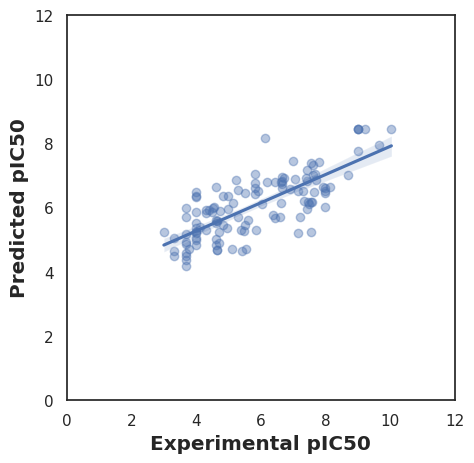

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test_imputed, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In Part 5, we will be comparing several ML algorithms for build regression models of Protein_Kinase inhibitors.

1. Import libraries

In [130]:
! pip install lazypredict

In [131]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

4. Compare ML algorithms

In [134]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train_imputed, Y_train_imputed)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train_imputed, Y_test_imputed)

100%|██████████| 42/42 [00:32<00:00,  1.31it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 682
[LightGBM] [Info] Number of data points in the train set: 484, number of used features: 198
[LightGBM] [Info] Start training from score 5.889608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

100%|██████████| 42/42 [00:28<00:00,  1.45it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 682
[LightGBM] [Info] Number of data points in the train set: 484, number of used features: 198
[LightGBM] [Info] Start training from score 5.889608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [135]:

# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.90,0.94,0.40,0.10
ExtraTreeRegressor,0.90,0.94,0.40,0.04
ExtraTreesRegressor,0.90,0.94,0.40,2.54
GaussianProcessRegressor,0.90,0.94,0.40,0.37
XGBRegressor,0.90,0.94,0.40,0.26
RandomForestRegressor,0.81,0.89,0.56,1.08
BaggingRegressor,0.78,0.87,0.61,0.13
MLPRegressor,0.74,0.85,0.65,1.09
HistGradientBoostingRegressor,0.73,0.84,0.67,0.71


In [136]:

# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,17103735202693383405868096992529262957675149061...,-1111742788175069864291518596276006849917445911...,5614488791776863394147661250560.00,0.17
KernelRidge,21.00,-12.00,6.07,0.09
GaussianProcessRegressor,12.71,-6.61,4.65,0.17
RANSACRegressor,8.85,-4.10,3.80,2.17
TransformedTargetRegressor,3.73,-0.77,2.24,0.05
LinearRegression,3.73,-0.77,2.24,0.15
HuberRegressor,2.90,-0.24,1.87,0.10
LinearSVR,2.82,-0.19,1.83,0.26
Ridge,2.63,-0.06,1.74,0.02


5. Data visualization of model performance

[(0.0, 1.0)]

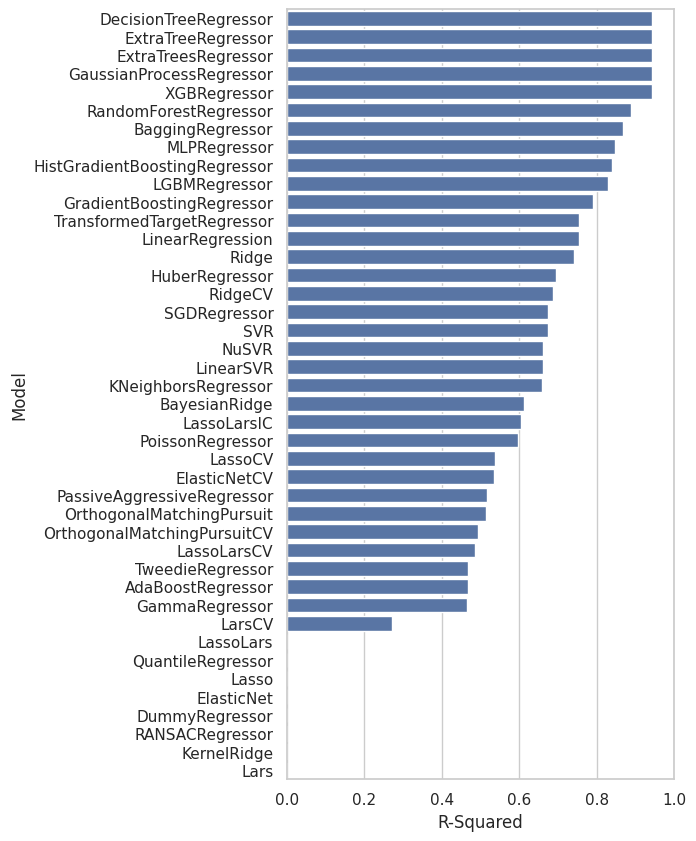

In [137]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

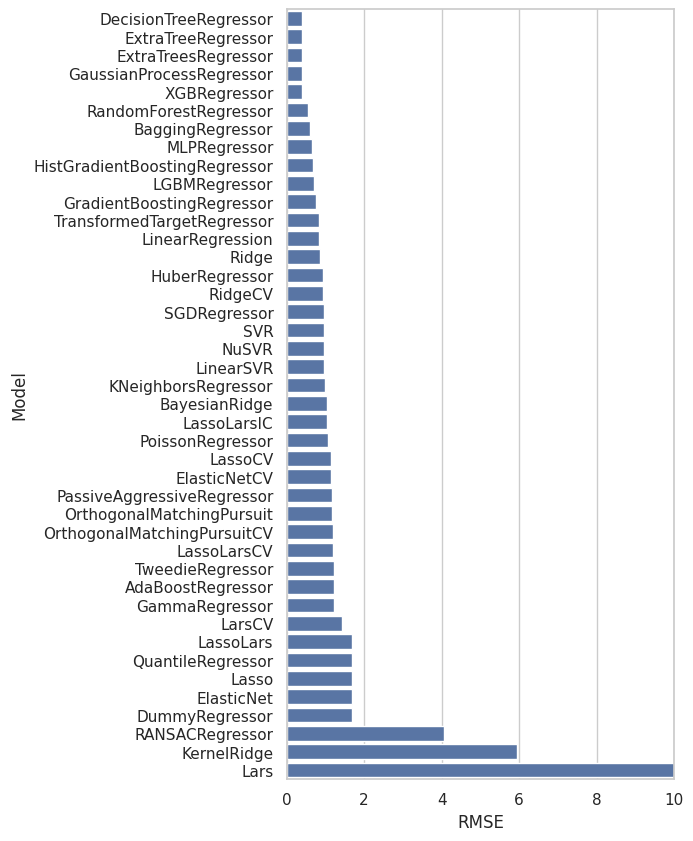

In [138]:

# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

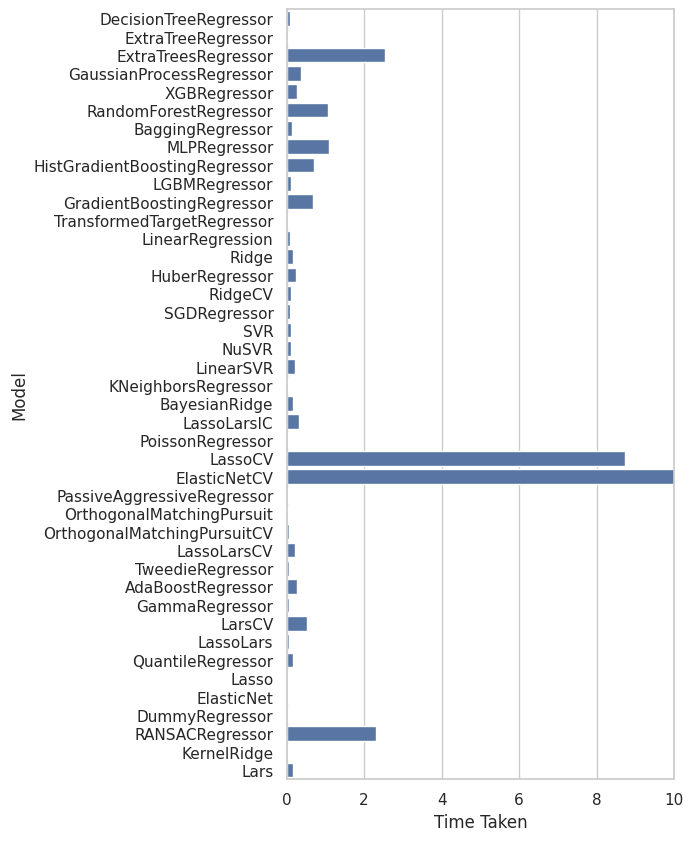

In [139]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))